https://byunghyun23.tistory.com/64

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# set gpu
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


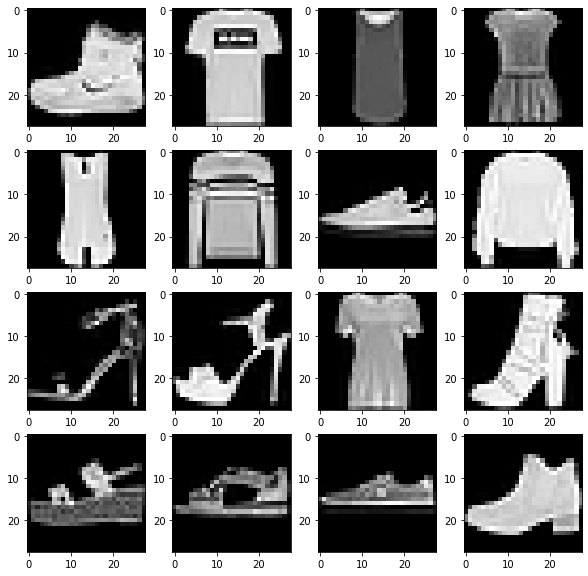

In [3]:
# 6.4 Fashion MNIST 데이터셋 불러오기 및 정규화
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

# 6.5 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

# 6.6 데이터 확인
# 전체 그래프의 사이즈를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(10, 10))
for c in range(16):
    # 4행 4열로 지정한 grid 에서 c+1 번째의 칸에 그래프를 그립니다. 1~16 번째 칸을 채우게 됩니다.
    plt.subplot(4, 4, c + 1)
    plt.imshow(train_X[c].reshape(28, 28), cmap='gray')

plt.show()

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(train_Y[:16])

In [7]:
# 6.7 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16, padding='valid'),
    tf.keras.layers.Conv2D(kernel_size=5, strides=3, filters=32),
    tf.keras.layers.Conv2D(kernel_size=3, strides=2, filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               73856     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 106,634
Trainable params: 106,634
Non-trainable params: 0
______________

Epoch 1/25
1407/1407 [==============================] - 13s 7ms/step - loss: 0.6921 - accuracy: 0.7503 - val_loss: 0.4414 - val_accuracy: 0.8373
Epoch 2/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3991 - accuracy: 0.8524 - val_loss: 0.3839 - val_accuracy: 0.8613
Epoch 3/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3427 - accuracy: 0.8738 - val_loss: 0.3700 - val_accuracy: 0.8667
Epoch 4/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3244 - accuracy: 0.8778 - val_loss: 0.3721 - val_accuracy: 0.8650
Epoch 5/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2953 - accuracy: 0.8914 - val_loss: 0.3740 - val_accuracy: 0.8663
Epoch 6/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2663 - accuracy: 0.9006 - val_loss: 0.3796 - val_accuracy: 0.8649
Epoch 7/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2499 - accuracy: 0.9089 - val_loss: 0.3864 - val_accuracy

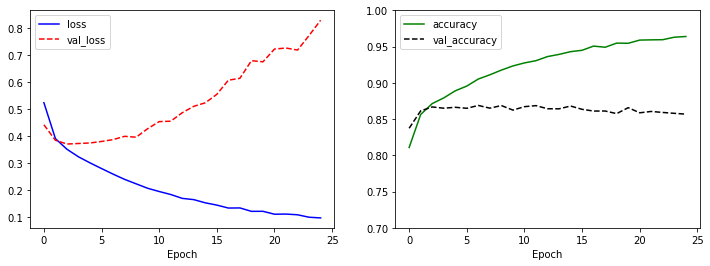

[0.865063488483429, 0.8543999791145325]

In [8]:
# 6.9 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
model.evaluate(test_X, test_Y, verbose=0)

Improve network via pooling and dropout

In [16]:
# 6.7 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16, padding='valid'),
    tf.keras.layers.MaxPool2D(strides=4),
    # tf.keras.layers.Conv2D(kernel_size=3, strides=1, filters=32),
    # tf.keras.layers.MaxPool2D(strides=2),
    tf.keras.layers.Conv2D(kernel_size=5, strides=2, filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 64)          25664     
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

Epoch 1/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7549 - accuracy: 0.7336 - val_loss: 0.3978 - val_accuracy: 0.8547
Epoch 2/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3913 - accuracy: 0.8566 - val_loss: 0.3439 - val_accuracy: 0.8730
Epoch 3/25
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3357 - accuracy: 0.8777 - val_loss: 0.3223 - val_accuracy: 0.8801
Epoch 4/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2987 - accuracy: 0.8925 - val_loss: 0.3124 - val_accuracy: 0.8853
Epoch 5/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2862 - accuracy: 0.8953 - val_loss: 0.3109 - val_accuracy: 0.8883
Epoch 6/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2676 - accuracy: 0.8996 - val_loss: 0.2910 - val_accuracy: 0.8934
Epoch 7/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2485 - accuracy: 0.9074 - val_loss: 0.2965 - val_accura

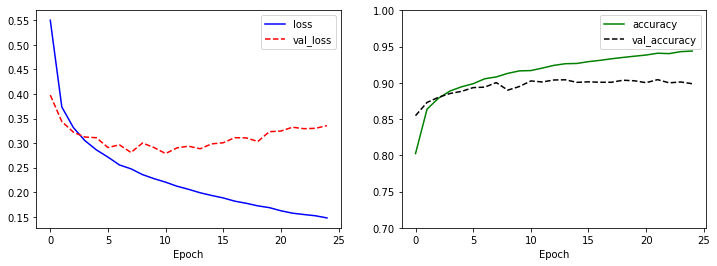

[0.3545933663845062, 0.8964999914169312]

In [17]:
# 6.9 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
model.evaluate(test_X, test_Y, verbose=0)

[0.397747278213501, 0.8906000256538391]